# **EDA de Membresia Premium**

In [ ]:
# Librerias necesarias

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Configuración para que solo se muestren 2 decimales

pd.set_option("display.float_format", "{:.2f}".format)

### Parte 1 - Carga de Datos

In [ ]:
df = pd.read_csv("../data/raw/base_datos_restaurantes_USA_v2.csv", sep=",")

pd.set_option('display.max_columns', None)
df.head()

,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
0,2550327378,Jackson,Gomez,31.00,Masculino,Miami,Alto,6,67.51,Sí,No,Vegetariano,Sí,(830)220-1926,NaN,Efectivo,6425
1,9446112038,Samantha,Soto,40.00,Femenino,Denver,Medio,2,44.92,Sí,Sí,Mariscos,No,881-476-1426,NaN,Efectivo,2374
2,3098363243,Terry,Adams,62.00,Femenino,Denver,Bajo,2,9.24,Sí,Sí,Vegetariano,No,NaN,diana74@example.net,Efectivo,1110
3,4013002847,James,Shannon,41.00,Masculino,Boston,Alto,5,30.74,Sí,Sí,Carnes,Sí,NaN,scottfrey@example.com,Tarjeta,6931
4,7372911048,Susan,Jones,49.00,Femenino,San Diego,Bajo,0,0.00,No,No,Carnes,No,243.248.8919,glassgary@example.org,Tarjeta,1350


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 30000 non-null  int64  
 1   nombre                     30000 non-null  object 
 2   apellido                   30000 non-null  object 
 3   edad                       29899 non-null  float64
 4   genero                     30000 non-null  object 
 5   ciudad_residencia          30000 non-null  object 
 6   estrato_socioeconomico     30000 non-null  object 
 7   frecuencia_visita          30000 non-null  int64  
 8   promedio_gasto_comida      29855 non-null  float64
 9   ocio                       30000 non-null  object 
 10  consume_licor              30000 non-null  object 
 11  preferencias_alimenticias  28597 non-null  object 
 12  membresia_premium          30000 non-null  object 
 13  telefono_contacto          14834 non-null  obj

###**2 - Exploracion Inicial de Datos**

In [ ]:
df = df.drop(columns=["telefono_contacto", "correo_electronico", "nombre", "apellido", "id_persona"])

In [ ]:
#Cambiar variables object a category
objects = ["genero", "ciudad_residencia", "estrato_socioeconomico", "ocio", "consume_licor", "membresia_premium",
            "preferencias_alimenticias", "tipo_de_pago_mas_usado"]

for col in objects:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   edad                       29899 non-null  float64 
 1   genero                     30000 non-null  category
 2   ciudad_residencia          30000 non-null  category
 3   estrato_socioeconomico     30000 non-null  category
 4   frecuencia_visita          30000 non-null  int64   
 5   promedio_gasto_comida      29855 non-null  float64 
 6   ocio                       30000 non-null  category
 7   consume_licor              30000 non-null  category
 8   preferencias_alimenticias  28597 non-null  category
 9   membresia_premium          30000 non-null  category
 10  tipo_de_pago_mas_usado     30000 non-null  category
 11  ingresos_mensuales         30000 non-null  int64   
dtypes: category(8), float64(2), int64(2)
memory usage: 1.1 MB


### Analisis de nulos

In [ ]:
#Analisis de cantidad numerica y porcentual de nulos por columna
def reporte_nulos(df: pd.DataFrame) -> pd.DataFrame:

    total = len(df)
    nulos = df.isna().sum()
    no_nulos = total - nulos
    unicos = df.nunique(dropna=True)
    dtypes = df.dtypes.astype(str)

    rep = pd.DataFrame({
        "columna": df.columns,
        "dtype": dtypes.values,
        "n_nulos": nulos.values,
        "%_nulos": (nulos.values / total) if total > 0 else 0,
        "n_no_nulos": no_nulos.values,
        "n_unicos": unicos.values
    })
    rep = rep.sort_values("%_nulos", ascending=False).reset_index(drop=True)
    return rep

reporte = reporte_nulos(df)
reporte

,columna,dtype,n_nulos,%_nulos,n_no_nulos,n_unicos
0,preferencias_alimenticias,category,1403,0.05,28597,6
1,promedio_gasto_comida,float64,145,0.00,29855,8186
2,edad,float64,101,0.00,29899,65
3,genero,category,0,0.00,30000,2
4,estrato_socioeconomico,category,0,0.00,30000,4
5,ciudad_residencia,category,0,0.00,30000,10
6,ocio,category,0,0.00,30000,2
7,frecuencia_visita,int64,0,0.00,30000,12
8,consume_licor,category,0,0.00,30000,2
9,membresia_premium,category,0,0.00,30000,2


Los datos nulos son estandarizados por pandas entonces no hace falta estandarizarlos en este caso

In [ ]:
# Analisis de registros duplicados

df.duplicated().sum()

np.int64(0)

No hay registros duplicados que haya que elimnar

Balance variable objetivo

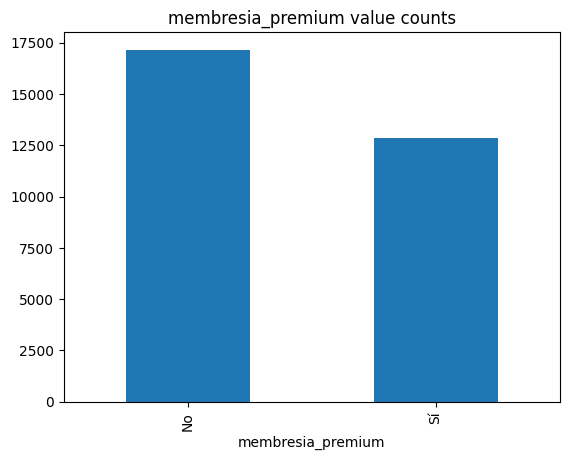

In [ ]:
# Gráfica de balance de variable objetivo

df["membresia_premium"].value_counts().plot(kind="bar", title="membresia_premium value counts")
plt.show()

In [ ]:
df["membresia_premium"].value_counts()

,count
membresia_premium,
No,17155
Sí,12845


In [ ]:
df["membresia_premium"].replace({"No": 0, "Sí": 1}, inplace=True)

df["membresia_premium"].astype("int64")

/tmp/ipython-input-1925040458.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["membresia_premium"].replace({"No": 0, "Sí": 1}, inplace=True)
/tmp/ipython-input-1925040458.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["membresia_premium"].replace({"No": 0, "Sí": 1}, inplace=True)


,membresia_premium
0,1
1,0
2,0
3,1
4,0
...,...
29995,1
29996,0
29997,1
29998,0


In [ ]:
df["membresia_premium"] = df["membresia_premium"].astype("int64")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   edad                       29899 non-null  float64 
 1   genero                     30000 non-null  category
 2   ciudad_residencia          30000 non-null  category
 3   estrato_socioeconomico     30000 non-null  category
 4   frecuencia_visita          30000 non-null  int64   
 5   promedio_gasto_comida      29855 non-null  float64 
 6   ocio                       30000 non-null  category
 7   consume_licor              30000 non-null  category
 8   preferencias_alimenticias  28597 non-null  category
 9   membresia_premium          30000 non-null  int64   
 10  tipo_de_pago_mas_usado     30000 non-null  category
 11  ingresos_mensuales         30000 non-null  int64   
dtypes: category(7), float64(2), int64(3)
memory usage: 1.3 MB


###**EDA**

###**Analisis Univariable**

### Variables Númericas

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
edad,29899.00,49.67,23.84,-5.00,33.00,49.00,65.00,300.00,4.17,42.44
frecuencia_visita,30000.00,3.90,2.74,-3.00,2.00,4.00,5.00,10.00,-0.35,0.65
promedio_gasto_comida,29855.00,32.60,26.40,0.00,13.29,25.51,44.40,149.97,1.42,2.12
membresia_premium,30000.00,0.43,0.49,0.00,0.00,0.00,1.00,1.00,0.29,-1.92
ingresos_mensuales,30000.00,5389.76,4538.49,800.00,1860.00,3402.00,7761.00,17999.00,1.16,0.31


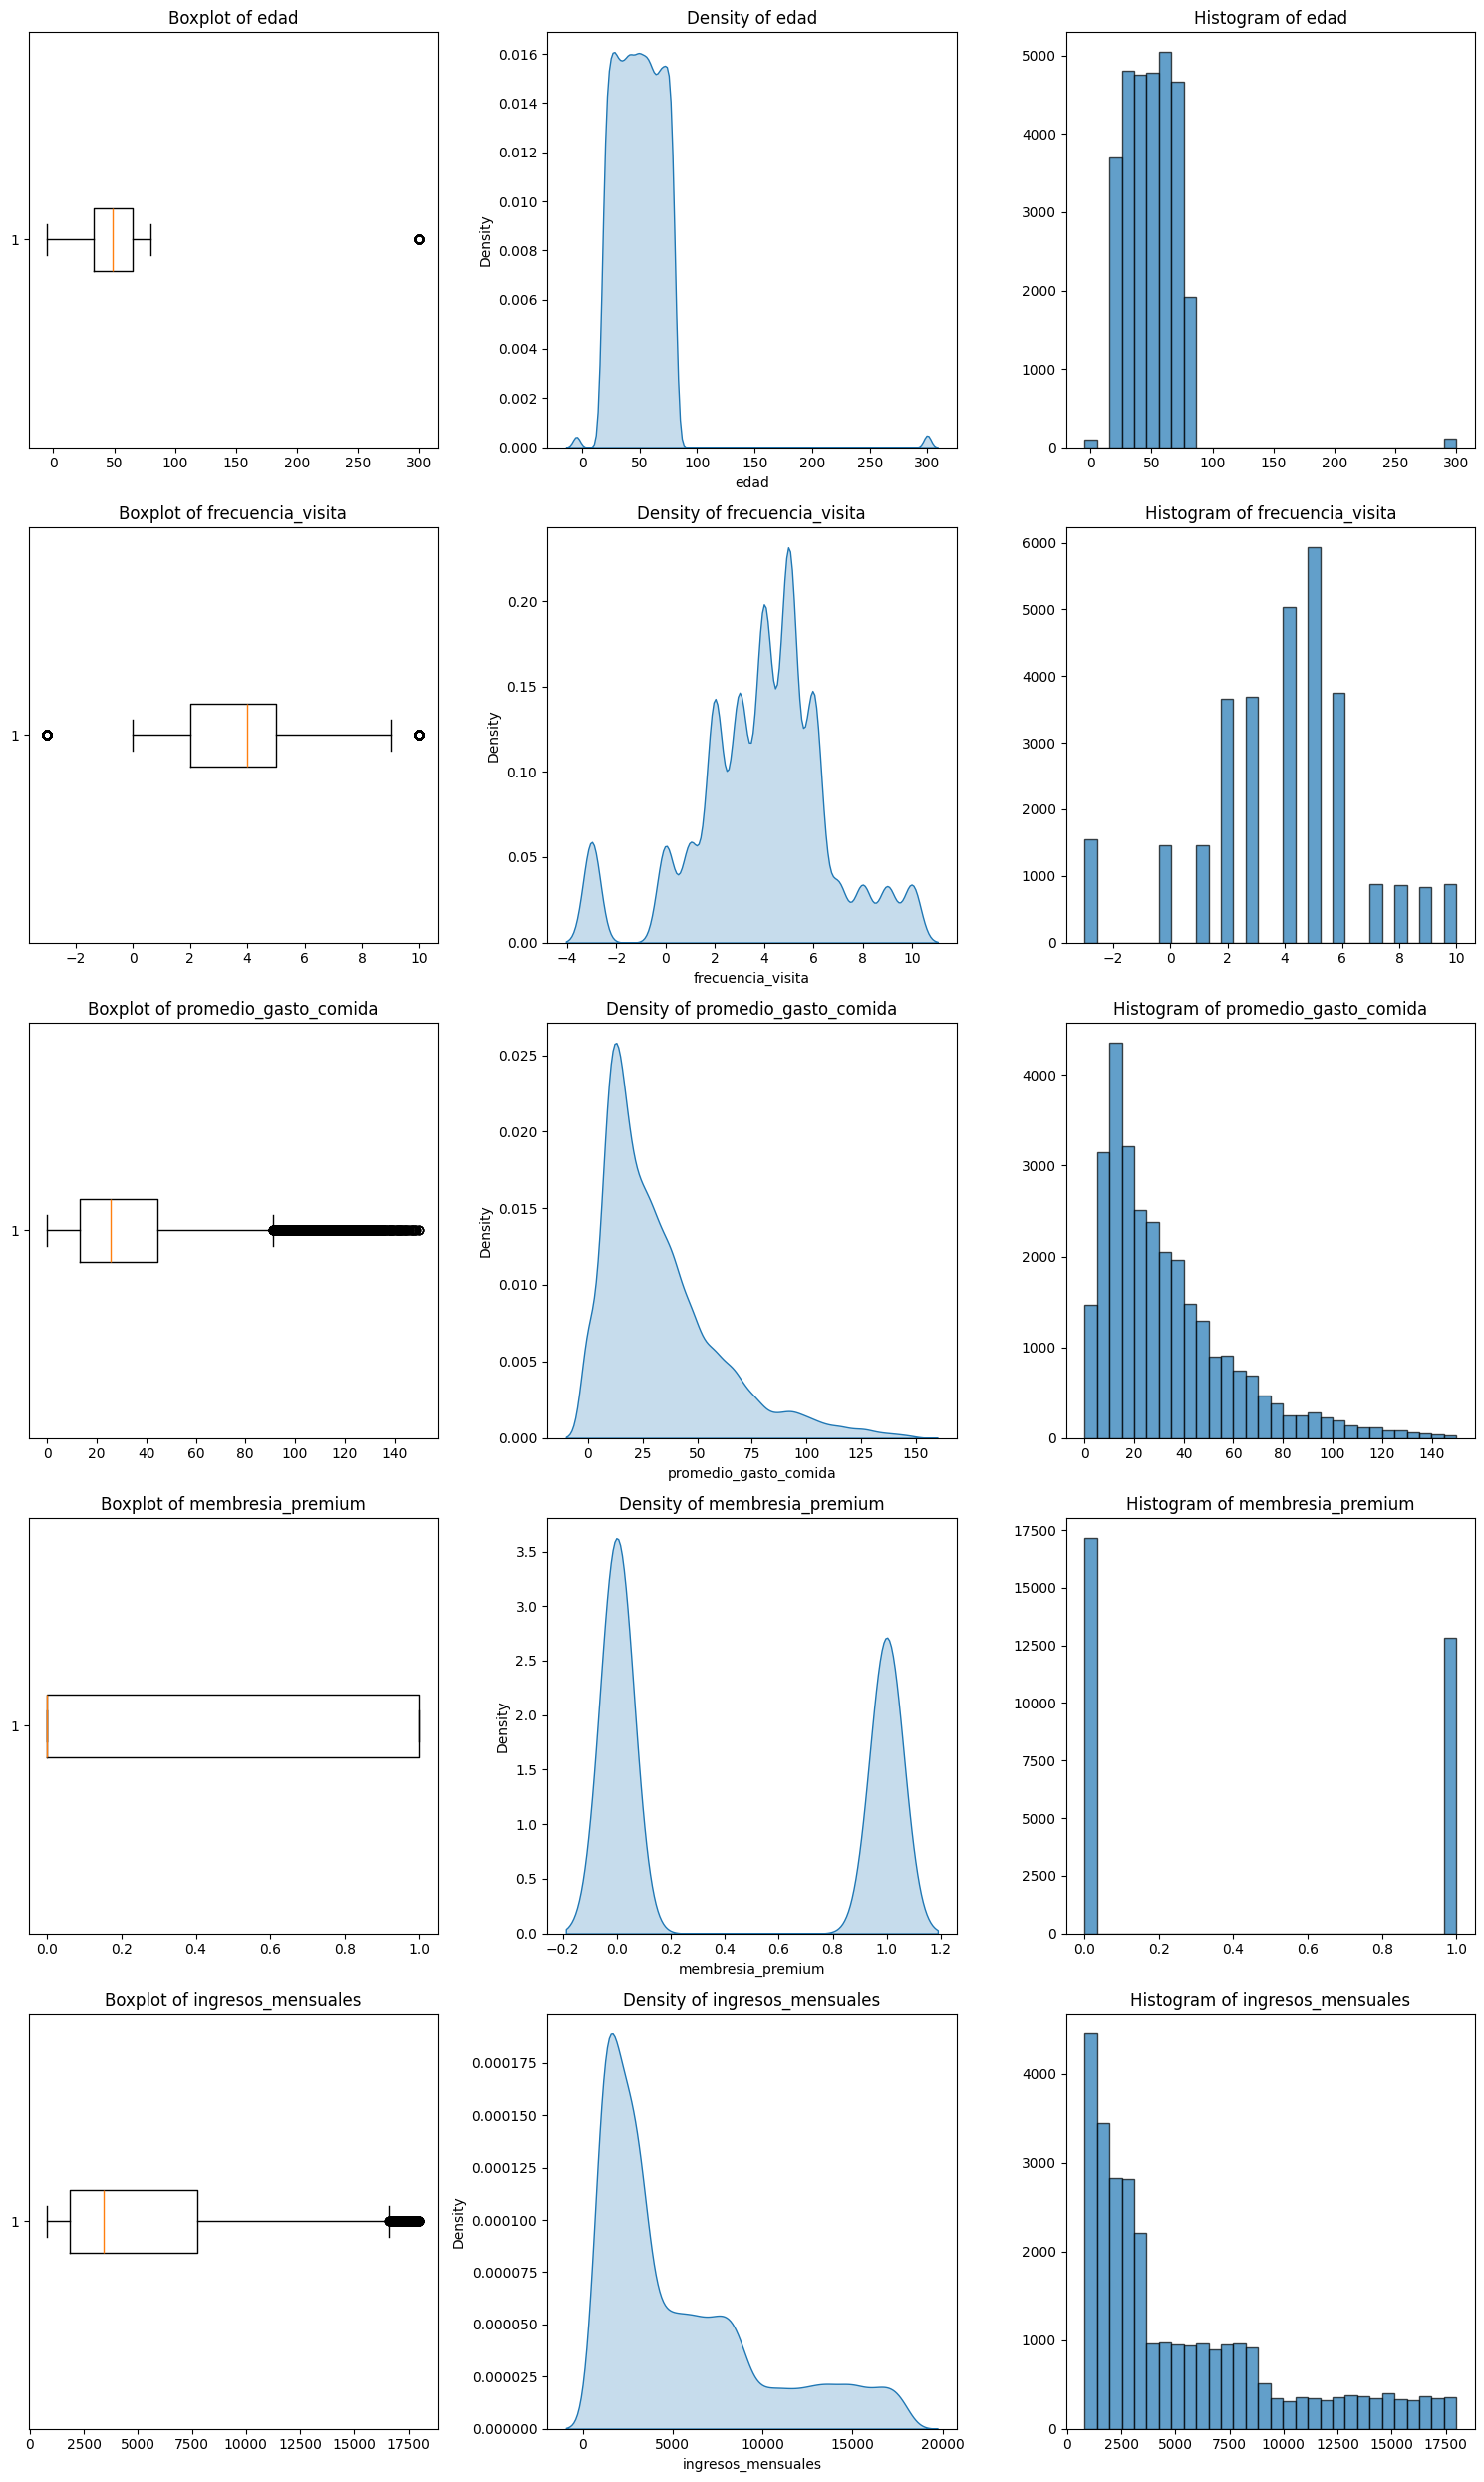

In [ ]:
#Analisis de Variables Numericas

num_cols = df.select_dtypes(include=["int64","float64"]).columns

#Resumen estadístico general
resumen = df[num_cols].describe().T
resumen["skewness"] = df[num_cols].skew()
resumen["kurtosis"] = df[num_cols].kurt()
display(resumen)

#Visualización variable por variable
fig, axes = plt.subplots(nrows=len(num_cols), ncols=3, figsize=(15, 5 * len(num_cols)))

for i, col in enumerate(num_cols):
    axes[i, 0].boxplot(df[col].dropna(), vert=False)
    axes[i, 0].set_title(f"Boxplot of {col}")

    # Density plot (approximation using histogram)
    sns.kdeplot(df[col], fill=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Density of {col}")

    # Histogram
    axes[i, 2].hist(df[col].dropna(), bins=30, edgecolor="black", alpha=0.7)
    axes[i, 2].set_title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

### Tabla pivote para variables númericas con bins

In [ ]:
#Tabla pivote numericas

def tabla_pivote_numerica(df, col, bins=5):
    """
    Genera tabla pivote de frecuencias para variable numérica, agrupada en bins
    """
    # Crea bins (ejemplo: 5 intervalos iguales)
    rangos = pd.cut(df[col], bins=bins)

    # Tabla con conteo y % relativo
    tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")
    tabla["%"] = (tabla["conteo"] / len(df) * 100).round(2)
    return tabla

for col in num_cols:
    print(f"\nTabla pivote para {col}")
    display(tabla_pivote_numerica(df, col, bins=5))


Tabla pivote para edad


/tmp/ipython-input-459076719.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")


,edad,conteo,%
0,"(-5.305, 56.0]",18655,62.18
1,"(56.0, 117.0]",11134,37.11
2,"(117.0, 178.0]",0,0.00
3,"(178.0, 239.0]",0,0.00
4,"(239.0, 300.0]",110,0.37



Tabla pivote para frecuencia_visita


/tmp/ipython-input-459076719.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")


,frecuencia_visita,conteo,%
0,"(-3.013, -0.4]",1547,5.16
1,"(-0.4, 2.2]",6581,21.94
2,"(2.2, 4.8]",8739,29.13
3,"(4.8, 7.4]",10556,35.19
4,"(7.4, 10.0]",2577,8.59



Tabla pivote para promedio_gasto_comida


/tmp/ipython-input-459076719.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")


,promedio_gasto_comida,conteo,%
0,"(-0.15, 29.994]",17072,56.91
1,"(29.994, 59.988]",8594,28.65
2,"(59.988, 89.982]",2766,9.22
3,"(89.982, 119.976]",1078,3.59
4,"(119.976, 149.97]",345,1.15



Tabla pivote para membresia_premium


/tmp/ipython-input-459076719.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")


,membresia_premium,conteo,%
0,"(-0.001, 0.2]",17155,57.18
1,"(0.2, 0.4]",0,0.00
2,"(0.4, 0.6]",0,0.00
3,"(0.6, 0.8]",0,0.00
4,"(0.8, 1.0]",12845,42.82



Tabla pivote para ingresos_mensuales


/tmp/ipython-input-459076719.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(rangos)[col].count().reset_index(name="conteo")


,ingresos_mensuales,conteo,%
0,"(782.801, 4239.8]",16710,55.70
1,"(4239.8, 7679.6]",5654,18.85
2,"(7679.6, 11119.4]",3396,11.32
3,"(11119.4, 14559.2]",2105,7.02
4,"(14559.2, 17999.0]",2135,7.12


### Variables categoricas

/tmp/ipython-input-1169866205.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="viridis")


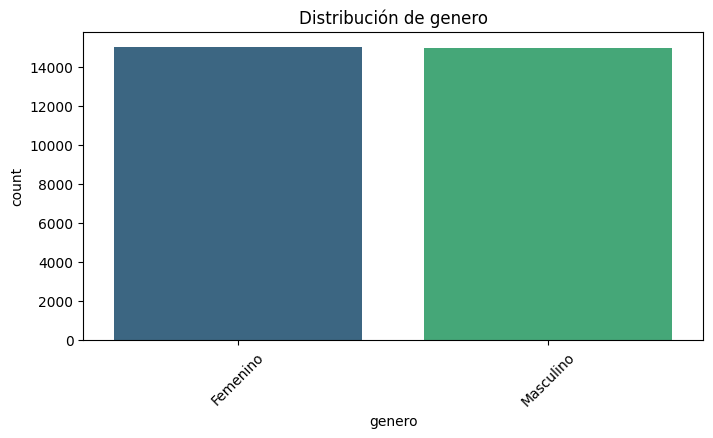

/tmp/ipython-input-1169866205.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="viridis")


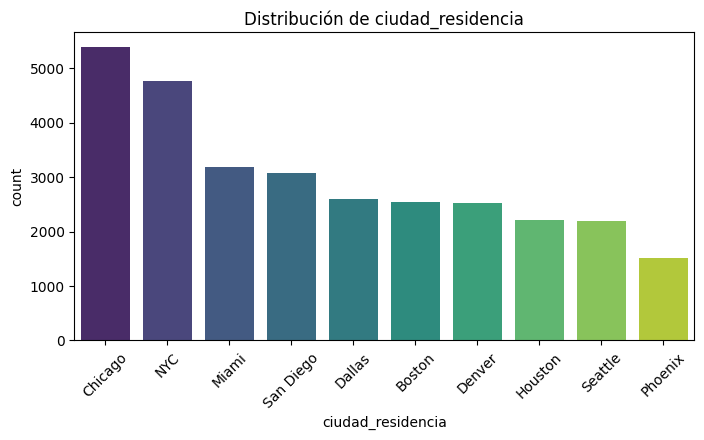

/tmp/ipython-input-1169866205.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="viridis")


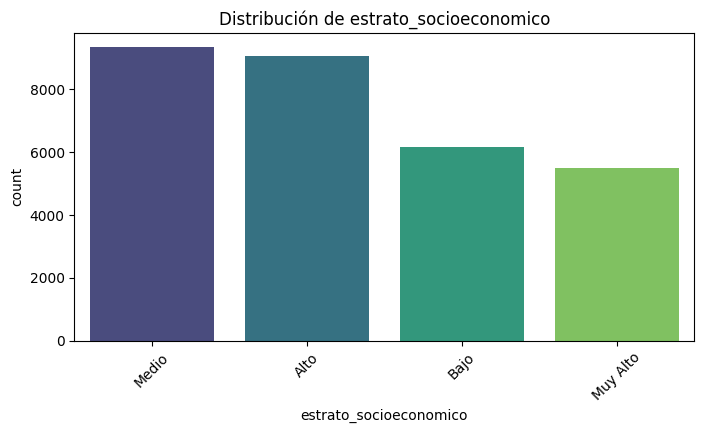

/tmp/ipython-input-1169866205.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="viridis")


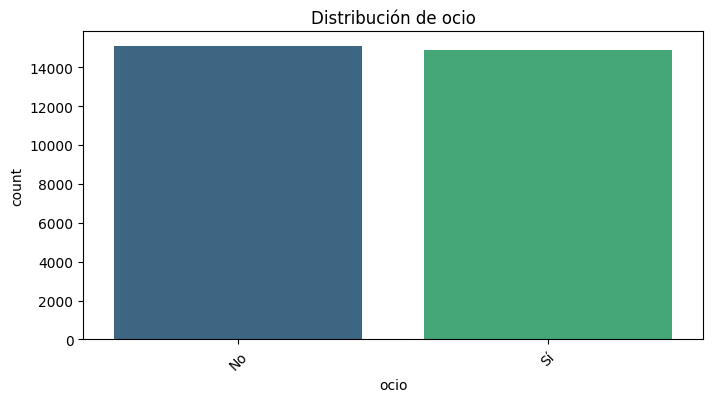

/tmp/ipython-input-1169866205.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="viridis")


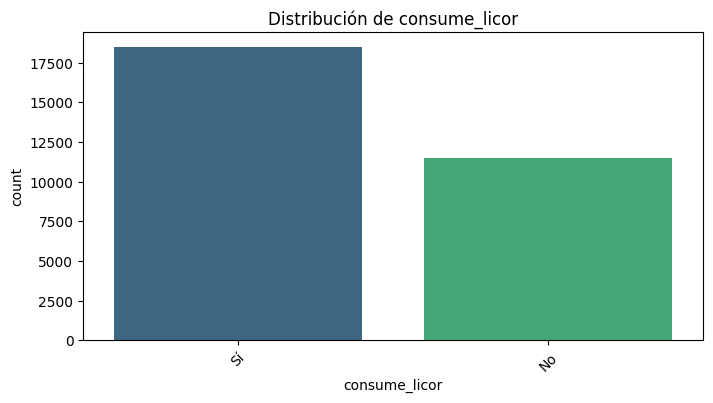

/tmp/ipython-input-1169866205.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="viridis")


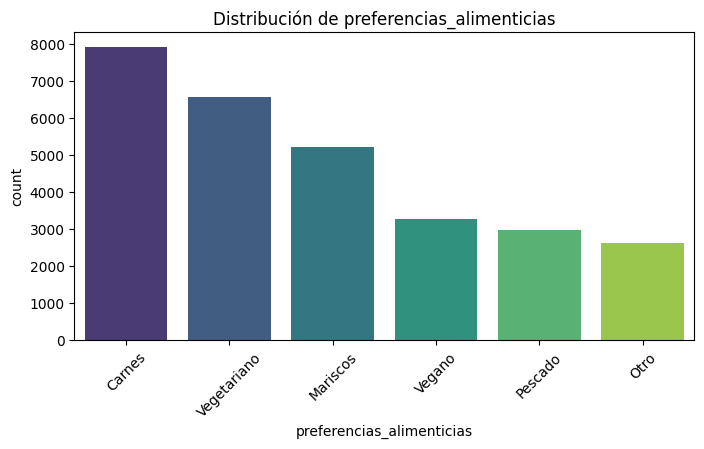

/tmp/ipython-input-1169866205.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette="viridis")


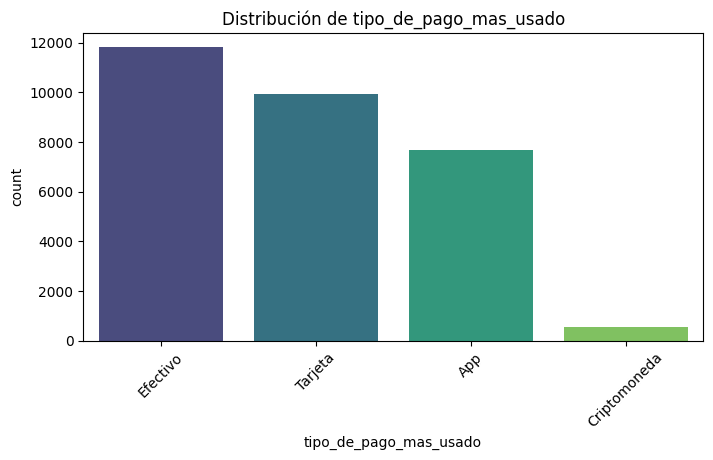

In [ ]:
#Analisis de variables categoricas

cat_cols = df.select_dtypes(include=["object","category"]).columns

#Visualización
for col in cat_cols:
    plt.figure(figsize=(8,4))
    order = df[col].value_counts().index  # ordena de mayor a menor
    sns.countplot(data=df, x=col, order=order, palette="viridis")
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.show()


Tablas pivote para variables categoricas

In [ ]:
#Tabla pivote categoricas

def tabla_pivote_categorica(df, col):

    tabla = df[col].value_counts(dropna=False).reset_index()
    tabla.columns = [col, "conteo"]
    tabla["%"] = (tabla["conteo"] / len(df) * 100).round(2)
    return tabla

for col in cat_cols:
    print(f"\nTabla pivote para {col}")
    display(tabla_pivote_categorica(df, col))


Tabla pivote para genero


,genero,conteo,%
0,Femenino,15044,50.15
1,Masculino,14956,49.85



Tabla pivote para ciudad_residencia


,ciudad_residencia,conteo,%
0,Chicago,5384,17.95
1,NYC,4769,15.90
2,Miami,3186,10.62
3,San Diego,3075,10.25
4,Dallas,2602,8.67
5,Boston,2547,8.49
6,Denver,2523,8.41
7,Houston,2212,7.37
8,Seattle,2191,7.30
9,Phoenix,1511,5.04



Tabla pivote para estrato_socioeconomico


,estrato_socioeconomico,conteo,%
0,Medio,9325,31.08
1,Alto,9038,30.13
2,Bajo,6161,20.54
3,Muy Alto,5476,18.25



Tabla pivote para ocio


,ocio,conteo,%
0,No,15094,50.31
1,Sí,14906,49.69



Tabla pivote para consume_licor


,consume_licor,conteo,%
0,Sí,18483,61.61
1,No,11517,38.39



Tabla pivote para preferencias_alimenticias


,preferencias_alimenticias,conteo,%
0,Carnes,7916,26.39
1,Vegetariano,6580,21.93
2,Mariscos,5212,17.37
3,Vegano,3267,10.89
4,Pescado,2983,9.94
5,Otro,2639,8.80
6,NaN,1403,4.68



Tabla pivote para tipo_de_pago_mas_usado


,tipo_de_pago_mas_usado,conteo,%
0,Efectivo,11813,39.38
1,Tarjeta,9954,33.18
2,App,7678,25.59
3,Criptomoneda,555,1.85


### Analisis Bivariable

Analisis de variables numericas con la variable objetivo [Pago_atiempo]

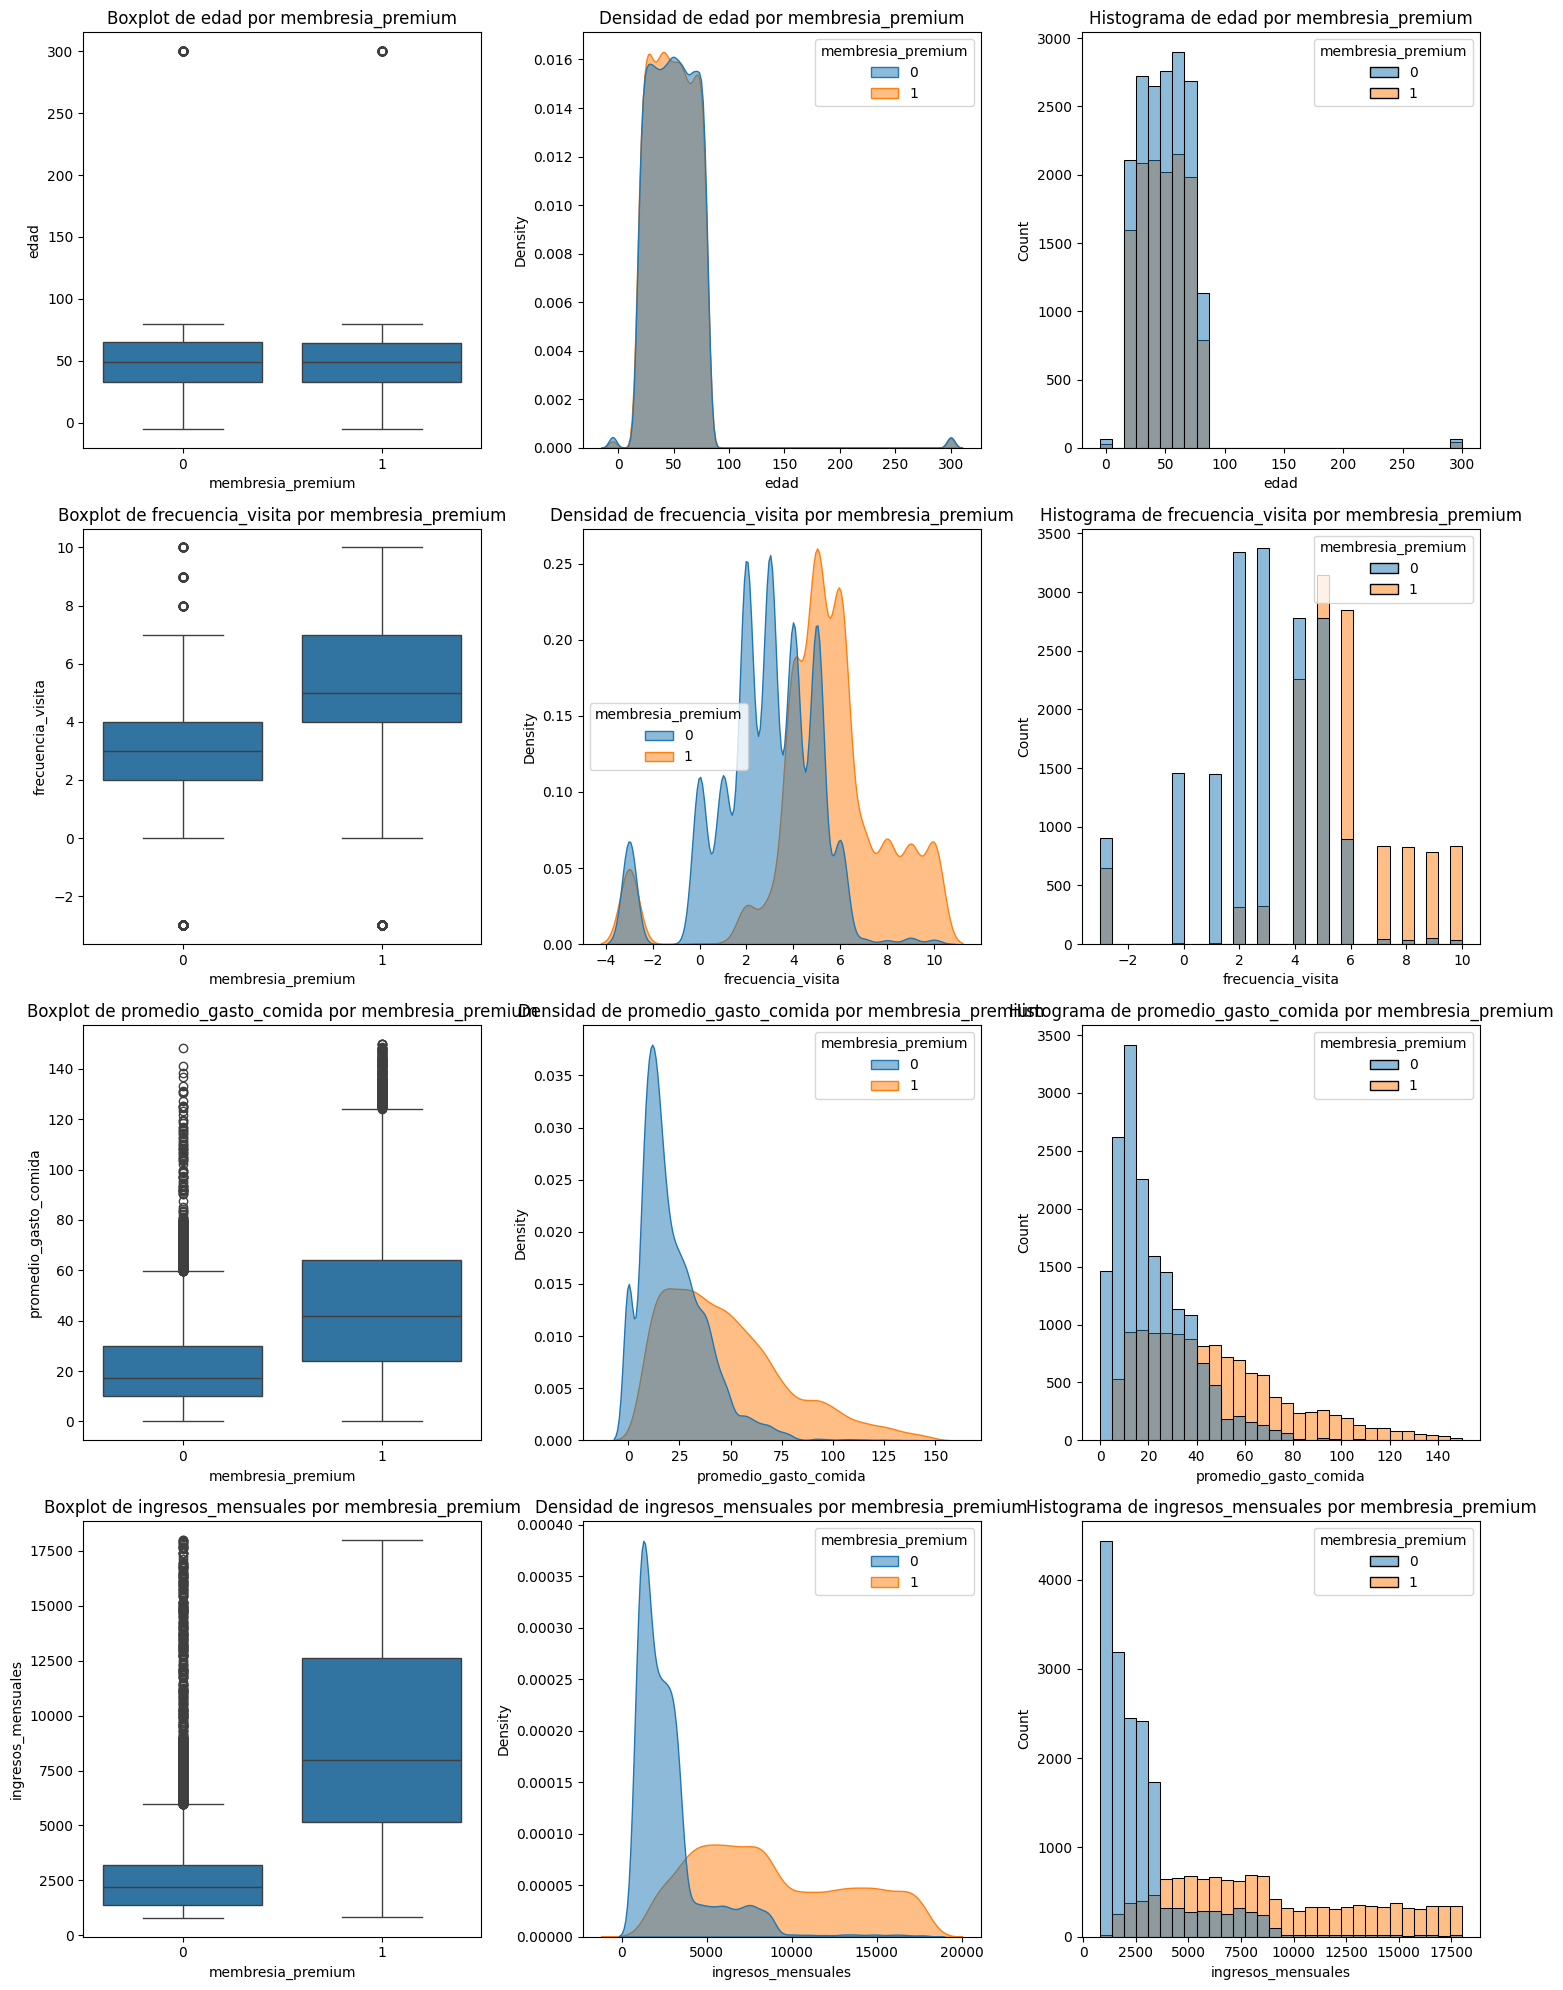

In [ ]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns.drop("membresia_premium")

fig, axes = plt.subplots(nrows=len(num_cols), ncols=3, figsize=(15, 5 * len(num_cols)))

for i, col in enumerate(num_cols):
    sns.boxplot(x="membresia_premium", y=col, data=df, ax=axes[i, 0])
    axes[i, 0].set_title(f"Boxplot de {col} por membresia_premium")

    sns.kdeplot(
        data=df,
        x=col,
        hue="membresia_premium",
        fill=True,
        common_norm=False,
        alpha=0.5,
        ax=axes[i, 1],
    )
    axes[i, 1].set_title(f"Densidad de {col} por membresia_premium")

    sns.histplot(data=df, x=col, hue="membresia_premium", bins=30, kde=False, alpha=0.5, ax=axes[i, 2])
    axes[i, 2].set_title(f"Histograma de {col} por membresia_premium")

plt.tight_layout()
plt.show()

# Tablas pivote por bins
def tabla_bivar_num(df, col, bins=4):
    df_tmp = df.copy()
    df_tmp[f"{col}_bin"] = pd.qcut(df_tmp[col], q=bins, duplicates="drop")
    tabla = df_tmp.groupby(f"{col}_bin")["membresia_premium"].agg(
        tasa_pago="mean",
        n="count"
    ).reset_index()
    tabla["tasa_pago"] = (tabla["tasa_pago"]*100).round(2)
    return tabla


Analisis de variables categoricas con variable objetivo

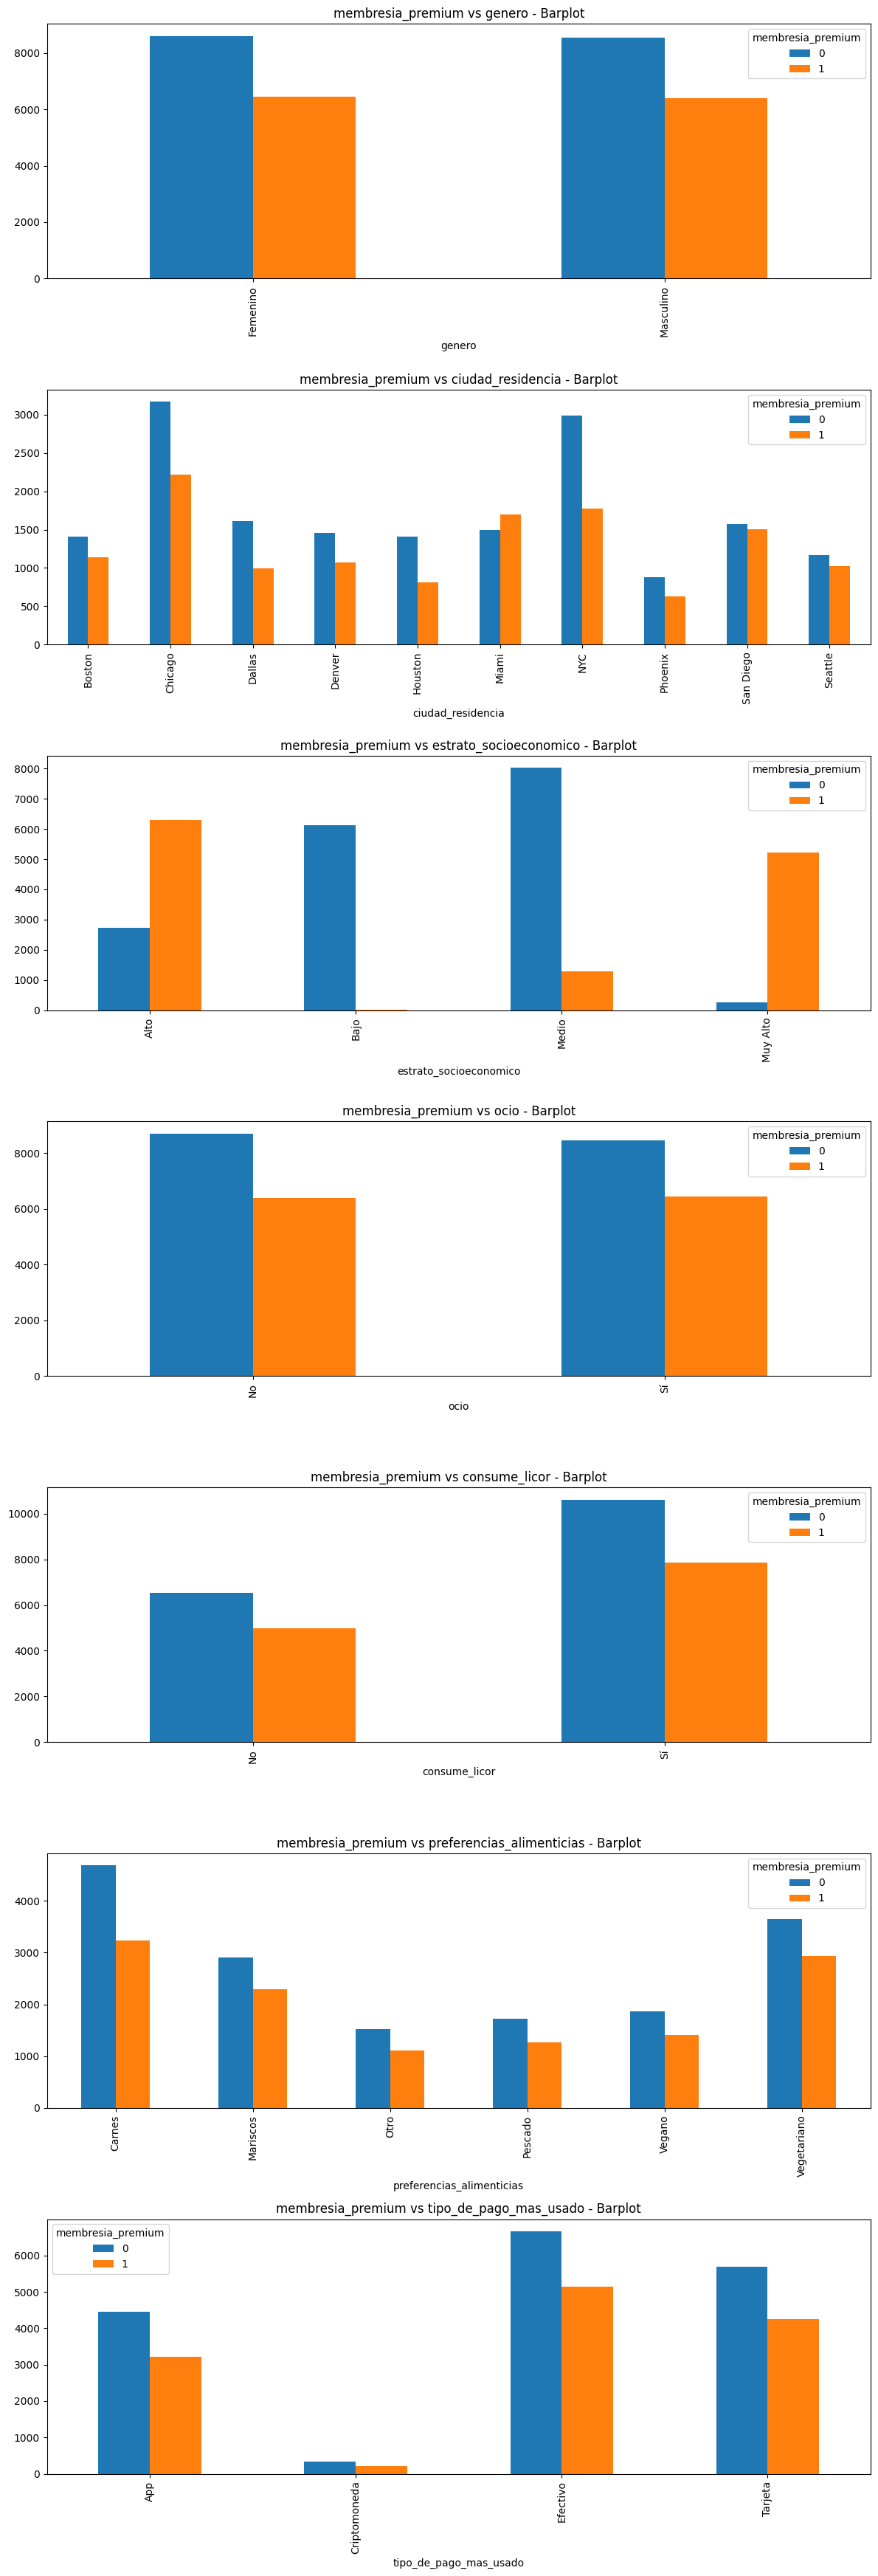

In [ ]:
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(12, 5 * max(len(cat_cols), 1)))

for i, col in enumerate(cat_cols):
    pd.crosstab(df[col], df["membresia_premium"]).plot(
        kind="bar", ax=axes[i], title=f"membresia_premium vs {col} - Barplot"
    )
plt.tight_layout()
plt.show()

In [ ]:
target = df["membresia_premium"]

temp = df.copy()
temp["membresia_premium"] = temp["membresia_premium"].astype("float64")

for col in cat_cols:
    heatmap = (
        pd.crosstab(df[col], target, margins=True)
        .style.background_gradient(cmap="coolwarm")
        .set_caption(f"membresia_premium vs {col} Heatmap")
    )
    display(heatmap)
    display(temp.groupby(col, observed=True).agg({"membresia_premium": "mean"}) * 100)

membresia_premium,0,1,All
genero,,,
Femenino,8601,6443,15044
Masculino,8554,6402,14956
All,17155,12845,30000


,membresia_premium
genero,
Femenino,42.83
Masculino,42.81


membresia_premium,0,1,All
ciudad_residencia,,,
Boston,1408,1139,2547
Chicago,3169,2215,5384
Dallas,1610,992,2602
Denver,1455,1068,2523
Houston,1404,808,2212
Miami,1492,1694,3186
NYC,2994,1775,4769
Phoenix,882,629,1511
San Diego,1573,1502,3075


,membresia_premium
ciudad_residencia,
Boston,44.72
Chicago,41.14
Dallas,38.12
Denver,42.33
Houston,36.53
Miami,53.17
NYC,37.22
Phoenix,41.63
San Diego,48.85


membresia_premium,0,1,All
estrato_socioeconomico,,,
Alto,2738,6300,9038
Bajo,6134,27,6161
Medio,8024,1301,9325
Muy Alto,259,5217,5476
All,17155,12845,30000


,membresia_premium
estrato_socioeconomico,
Alto,69.71
Bajo,0.44
Medio,13.95
Muy Alto,95.27


membresia_premium,0,1,All
ocio,,,
No,8695,6399,15094
Sí,8460,6446,14906
All,17155,12845,30000


,membresia_premium
ocio,
No,42.39
Sí,43.24


membresia_premium,0,1,All
consume_licor,,,
No,6535,4982,11517
Sí,10620,7863,18483
All,17155,12845,30000


,membresia_premium
consume_licor,
No,43.26
Sí,42.54


membresia_premium,0,1,All
preferencias_alimenticias,,,
Carnes,4685,3231,7916
Mariscos,2913,2299,5212
Otro,1529,1110,2639
Pescado,1719,1264,2983
Vegano,1864,1403,3267
Vegetariano,3644,2936,6580
All,16354,12243,28597


,membresia_premium
preferencias_alimenticias,
Carnes,40.82
Mariscos,44.11
Otro,42.06
Pescado,42.37
Vegano,42.94
Vegetariano,44.62


membresia_premium,0,1,All
tipo_de_pago_mas_usado,,,
App,4459,3219,7678
Criptomoneda,333,222,555
Efectivo,6666,5147,11813
Tarjeta,5697,4257,9954
All,17155,12845,30000


,membresia_premium
tipo_de_pago_mas_usado,
App,41.92
Criptomoneda,40.00
Efectivo,43.57
Tarjeta,42.77


### Analisis Multivariable

Matriz de correlación

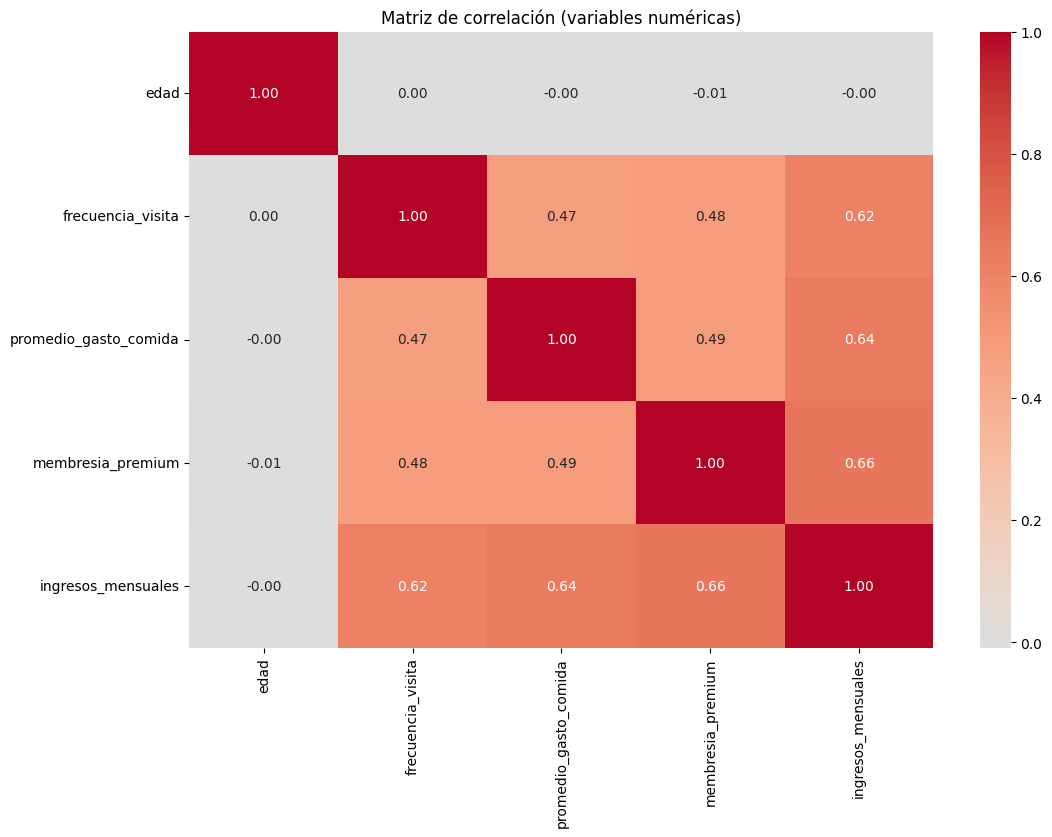

In [ ]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns

# Matriz de correlación
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(method="pearson"),
            annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlación (variables numéricas)")
plt.show()

Pairplot

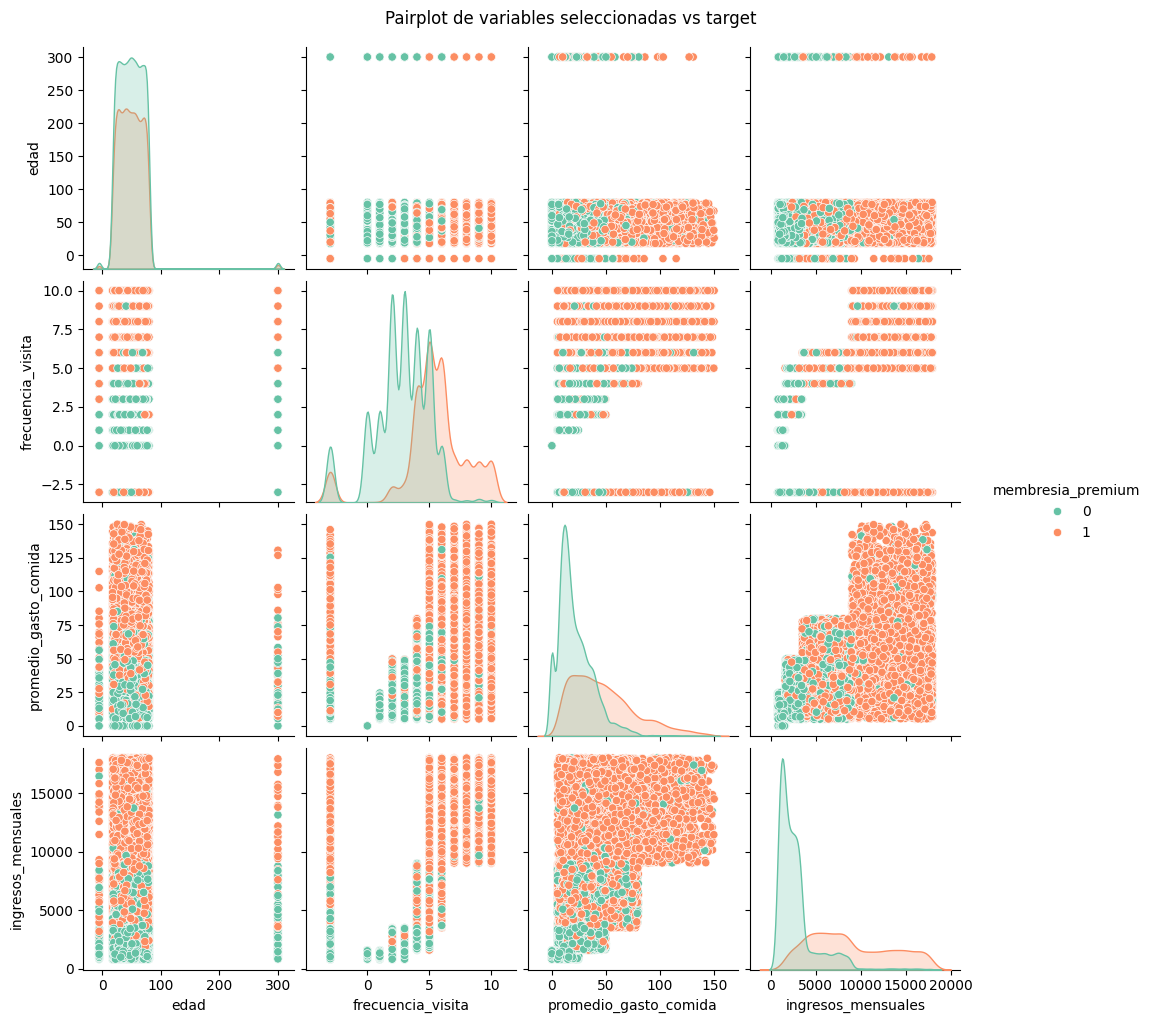

In [ ]:
#Pairplot
subset = df.select_dtypes(include=["int64","float64"]).columns

sns.pairplot(df[subset], hue="membresia_premium", diag_kind="kde", palette="Set2")
plt.suptitle("Pairplot de variables seleccionadas vs target", y=1.02)
plt.show()
